In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df_criticas = pd.read_csv("./train.csv",encoding='utf-8')
df = df_criticas.copy()
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

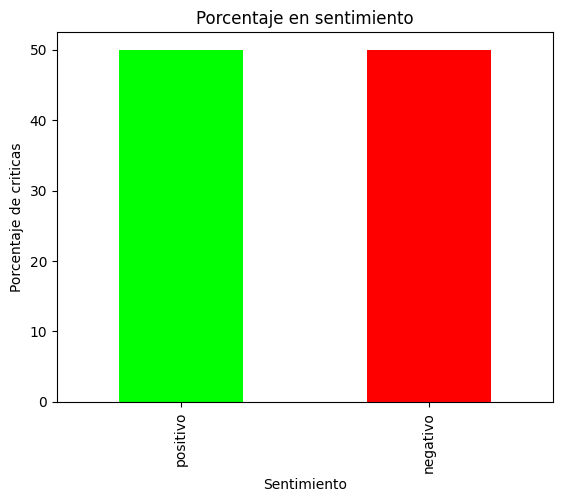

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

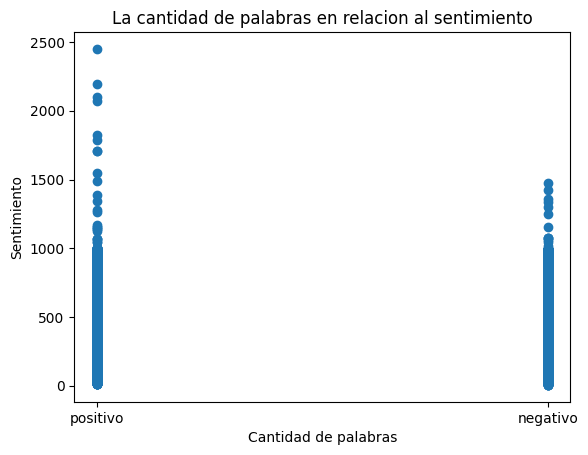

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

In [4]:
vectorizer = CountVectorizer(min_df=0.1, max_df=0.7,token_pattern=r'\b(?:[^\d\W_])+\b')
X = vectorizer.fit_transform(df['review_es'])
palabras = vectorizer.get_feature_names_out()
print(palabras)
print(len(palabras))
print(X.toarray())

['actores' 'actuación' 'ahora' 'al' 'algo' 'alguien' 'algunas' 'algunos'
 'antes' 'aquí' 'así' 'aunque' 'años' 'aún' 'bastante' 'bien' 'buen'
 'buena' 'bueno' 'cada' 'casi' 'cine' 'como' 'con' 'cosas' 'creo'
 'cualquier' 'cuando' 'cómo' 'debe' 'decir' 'del' 'demasiado' 'desde'
 'después' 'director' 'donde' 'dos' 'durante' 'e' 'ella' 'ellos' 'embargo'
 'entonces' 'entre' 'era' 'esa' 'escena' 'escenas' 'ese' 'eso' 'estaba'
 'este' 'esto' 'estoy' 'está' 'están' 'final' 'forma' 'fue' 'fuera' 'gran'
 'ha' 'haber' 'había' 'hace' 'hacer' 'han' 'hasta' 'hay' 'he' 'hecho'
 'historia' 'hizo' 'hombre' 'incluso' 'le' 'luego' 'lugar' 'mal' 'manera'
 'mayoría' 'me' 'mejor' 'mejores' 'menos' 'mi' 'mientras' 'minutos'
 'mismo' 'momento' 'muchas' 'mucho' 'muchos' 'muy' 'más' 'nada' 'ni'
 'nunca' 'o' 'otra' 'otro' 'otros' 'parece' 'parte' 'películas' 'pero'
 'personaje' 'personajes' 'personas' 'poco' 'podría' 'porque' 'primera'
 'puede' 'puedo' 'qué' 'real' 'realidad' 'realmente' 'sea' 'ser' 'si'
 'sido

In [5]:
for i, palabra in enumerate(palabras):
    df[palabra] = X.toarray()[:, i]

df.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

,ID,review_es,sentimiento,num_palabras,actores,actuación,ahora,al,algo,alguien,...,través,uno,veces,ver,vez,vi,vida,visto,ya,él
0,0,Uno de los otros críticos ha mencionado que de...,positivo,345,0,0,0,2,0,0,...,0,1,0,1,0,0,0,1,2,1
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,161,1,0,0,0,0,0,...,0,1,2,1,0,0,1,0,0,0
2,2,Pensé que esta era una manera maravillosa de p...,positivo,173,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,137,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,0,1,0,0,0,0,...,0,2,0,2,0,0,1,0,1,0
5,5,Probablemente mi película favorita de todos lo...,positivo,123,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
6,6,Seguro que me gustaría ver una resurrección de...,positivo,157,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo,168,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,8,Alentados por los comentarios positivos sobre ...,negativo,120,0,1,0,1,0,0,...,0,2,1,2,1,0,0,1,0,0
9,9,"Si te gusta la risa original desgarradora, te ...",positivo,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ensamble Hibrido Tipo Voting

In [8]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 2.2 MB/s eta 0:00:33
                                              0.3/70.9 MB 2.9 MB/s eta 0:00:25
                                              0.4/70.9 MB 2.6 MB/s eta 0:00:28
                                              0.5/70.9 MB 2.8 MB/s eta 0:00:26
                                              0.7/70.9 MB 2.8 MB/s eta 0:00:25
                                              0.8/70.9 MB 3.0 MB/s eta 0:00:24
                                              1.0/70.9 MB 3.0 MB/s eta 0:00:24
                                              1.1/70.9 MB 2.9 MB/s eta 0:00:24
                                              1.2/70.9 MB 2.9 MB/s eta 0:00:24
                                              1.4/70.9 MB 2.9 MB/s eta 0:00:24
                                              1.5/70.9 MB 2.9 MB/s eta 0:00:25
                                              1.6/70.9 MB 2

In [6]:
df.drop(columns='ID',inplace=True)
df.drop(columns='review_es',inplace=True)

ds_x=df.drop(['sentimiento'], axis='columns', inplace=False)
ds_y = df['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=4, #semilla
                                                    stratify=df["sentimiento"].values)

In [9]:
import numpy as np
import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import uniform, randint

from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


import xgboost as xgb
import warnings
warnings.filterwarnings('always')

Abrimos el Random Forest que conseguimos anteriormente con los mejores hiperparametros encontrados a través de RandomSearch

In [10]:
# Cargamos el modelo
import joblib
filename = 'RandomForest.sav'
random_forest = joblib.load(filename)

In [11]:
#Creo clasificadores

log_clf = xgb.XGBClassifier(random_state=0, n_estimators=100)
#rnd_clf = RandomForestClassifier()
des_tree_clf = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15, 
                                         min_samples_leaf=10,
                                         ccp_alpha=0.01)

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('xgb', log_clf), ('rnd', random_forest), ('knn', des_tree_clf)], voting = 'soft', weights=[2,1,1])


#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)

In [22]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,pred)
#recall=recall_score(y_test,pred)
#f1=f1_score(y_test,pred,)
#precision=precision_score(y_test,pred)

print("Accuracy: "+str(accuracy))
#print("Recall: "+str(recall))
#print("f1 score: "+str(f1))
#print("Precision: "+str(precision))

Accuracy: 0.7248


AUC: 0.8004610222222222


c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:219: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


              precision    recall  f1-score   support

    negativo       0.74      0.70      0.72      7500
    positivo       0.72      0.75      0.73      7500

    accuracy                           0.72     15000
   macro avg       0.73      0.72      0.72     15000
weighted avg       0.73      0.72      0.72     15000



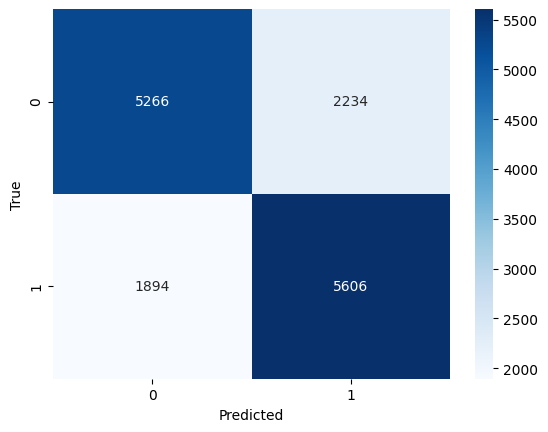

In [23]:
#Evaluo en el set de test
pred_proba= vot_clf.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, pred_proba))

#Matriz de Confusion
pred=vot_clf.predict(x_test)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,pred))

## Predict de kaggle

In [24]:
df_criticas_test = pd.read_csv('./test.csv')
df_test = df_criticas_test.copy()
df_test.head(10)

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
5,60005,La llegada de Rafa a Euskadi es como ponerse a...
6,60006,El nivel del cine y lo peor la capacidad intel...
7,60007,Es triste ver una película como ésta y escucha...
8,60008,Puedo entender que Torrente I y II y Lo imposi...
9,60009,"-Ahivalohostia, Txomin, qué montón de gente ri..."


In [25]:
df_test['num_palabras'] = df_test['review_es'].str.split().apply(len)

vectorizer = CountVectorizer(vocabulary=palabras)
matriz_caracteristicas_test = vectorizer.fit_transform(df_test['review_es'])

for i, palabra in enumerate(palabras):
    df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]


_df_test = df_test.drop(columns='ID',inplace=False)
_df_test.drop(columns='review_es',inplace=True)

_df_test.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\3509754027.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\3509754027.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_15036\3509754027.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

,num_palabras,actores,actuación,ahora,al,algo,alguien,algunas,algunos,antes,...,través,uno,veces,ver,vez,vi,vida,visto,ya,él
0,785,0,0,0,5,0,0,0,0,1,...,0,1,0,2,0,0,1,0,2,1
1,206,1,0,0,0,1,0,1,0,0,...,0,0,1,2,0,0,1,0,0,0
2,132,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,319,0,0,1,5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,290,0,0,1,1,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
5,403,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6,102,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,358,0,0,0,2,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
8,166,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,561,1,0,1,1,0,0,0,0,0,...,0,1,0,2,0,0,0,1,2,0


In [26]:
pred_kaggle_vot = vot_clf.predict(_df_test)
df_kaggle_rf = pd.DataFrame({'ID': df_test['ID'], 'sentimiento': pred_kaggle_vot})
df_kaggle_rf.head(10)

,ID,sentimiento
0,60000,positivo
1,60001,positivo
2,60002,negativo
3,60003,negativo
4,60004,positivo
5,60005,positivo
6,60006,positivo
7,60007,negativo
8,60008,negativo
9,60009,positivo


In [27]:
df_kaggle_rf.shape[0]

8599

In [28]:
df_kaggle_rf.to_csv('pred_kaggle_voting.csv', index=False)